In [51]:
import numpy as np
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib
import json, math
from operator import sub
import polars as pl
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 501
n = 100
i = 120
q = 200

In [52]:
def get_num_coding_actions(mg):
    num_coded = 0
    num_runs = 15

    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_mg{mg}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_coded += data['num_coded']
        except:
            errors += 1

    if errors == num_runs:
        return 0
    return num_coded / (num_runs-errors)


In [53]:
def get_num_fwd_actions(mg):
    num_fwd = 0
    num_runs = 15

    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_mg{mg}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return 1
    return num_fwd / (num_runs-errors)

In [54]:
mgs = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
coding_share = []

for mg in mgs:
    num_coded = get_num_coding_actions(mg)
    num_fwd = get_num_fwd_actions(mg)
    coding_share.append(num_coded / num_fwd)
    print(mg, num_coded, num_coded / num_fwd)

0 43819.8 0.37202303802655395
10 19487.285714285714 0.14391676289356978
20 5828.866666666667 0.04053010426304771
30 355.73333333333335 0.0024116467714847176
40 3.5 2.3666707077166508e-05
50 0.0 0.0
60 0.0 0.0
70 0.0 0.0
80 0.0 0.0
90 0.0 0.0
100 0.0 0.0


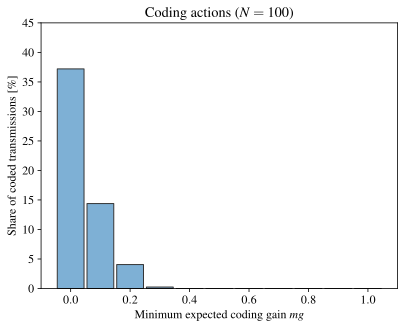

In [55]:
fig, ax = plt.subplots()

rdf_color = '#7eb0d5'

ax.bar( mgs / 100, np.array(coding_share) * 100, width=0.09, edgecolor='#333', color=rdf_color)

ax.set_xlabel('Minimum expected coding gain $mg$')
ax.set_ylabel('Share of coded transmissions [\%]')
# leg = ax.legend(fancybox=False, framealpha=1.0, prop={'size': 11})
# leg.get_frame().set_edgecolor('#333')

ax.set_ylim(0, 45)

plt.title(f'Coding actions ($N={n}$)')
fig.savefig(f"../figures/nc_rdf_coding_share_n{n}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/nc_rdf_coding_share_n{n}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)
plt.show()